In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. Import


In [ ]:
!pip install opendatasets
!pip install pandas
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import opendatasets as od
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Checking dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df.head(5)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
print(df.shape)

(70692, 22)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

# 2. Dataset detail



## 2.1 Dataset description

Diabetes_012: Mức độ tiểu đường (0: Không có, 1: Tiểu đường nhẹ, 2: Tiểu Đường nặng)

HighBP: Huyết áp cao (0: không cao, 1: cao)

HighChol: Cholesterol cao (0: không cao, 1: cao)

CholCheck: Kiểm tra Cholesterol 5 năm 1 lần (0: không, 1:có)

BMI: Chỉ khối cơ thể :Trọng lượng/Chiều cao^2

Smoker: Hút ít nhất 100 điếu thuốc cả đời (0: không, 1:có)

Stroke: Từng đột quỵ (0: không, 1:có)

HeartDiseaseorAttack: Bệnh tim mạch vành hoặc nhồi máu cơ tim (0: không, 1:có)

PhysicActivity: Hoạt động thể chất trong vòng 30 ngày qua ()(Không tính làm việc) (0: không, 1:có)

Fruits: Ăn trái cây ít nhất 1 lần trong ngày (0: không, 1:có)

Veggies: Ăn rau ít nhất 1 lần trong ngày (0: không, 1:có)

HvyAlcoholConsump: Tiêu thụ nhiều đồ uống có cồn (nam >14 lần/tuần, nữ >7 lần/tuần) (0: không, 1:có)

AnyHealthcare: có bảo hiểm sức khỏe (0: không, 1:có)

NoDocbcCost: Trong vòng 12 tháng, phải đến bác sĩ như không đủ tiền (0: không, 1:có)

GenHlth: Tự đánh giá sức khỏe bản thân theo thang 1-5

MentHlth: Số ngày bị vấn đề về tinh thần theo thang 1 - 30

PhysHlth: Số ngày bị vấn đề về thể chất theo thang 1 - 30

DiffWalk: Gặp vấn đề khi đi bộ/ leo cầu thang (0: không, 1:có)

Sex : Giới tính (0: Nữ, 1:Nam)

Age : Khung độ tuổi

Education: Trình độ học vấn

Income: Khung thu nhập


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,70692.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,70692.0,0.563458,0.495960,0.0,0.0,1.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
Stroke,70692.0,0.062171,0.241468,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0


## 2.2 Checking dataset unique values


In [ ]:
#checking unique values in different variables
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


## 2.3 Checking and remove duplicates rows

In [ ]:
# Checking duplicates rows in dataset to eliminate them
duplicates = df[df.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()

Duplicate Rows :  1635


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
602,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
689,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
891,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
1092,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
1326,0.0,1.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,5.0,6.0


In [ ]:
df.drop_duplicates(inplace = True)
df.shape

(69057, 22)

## 2.4 Visualizing dataset


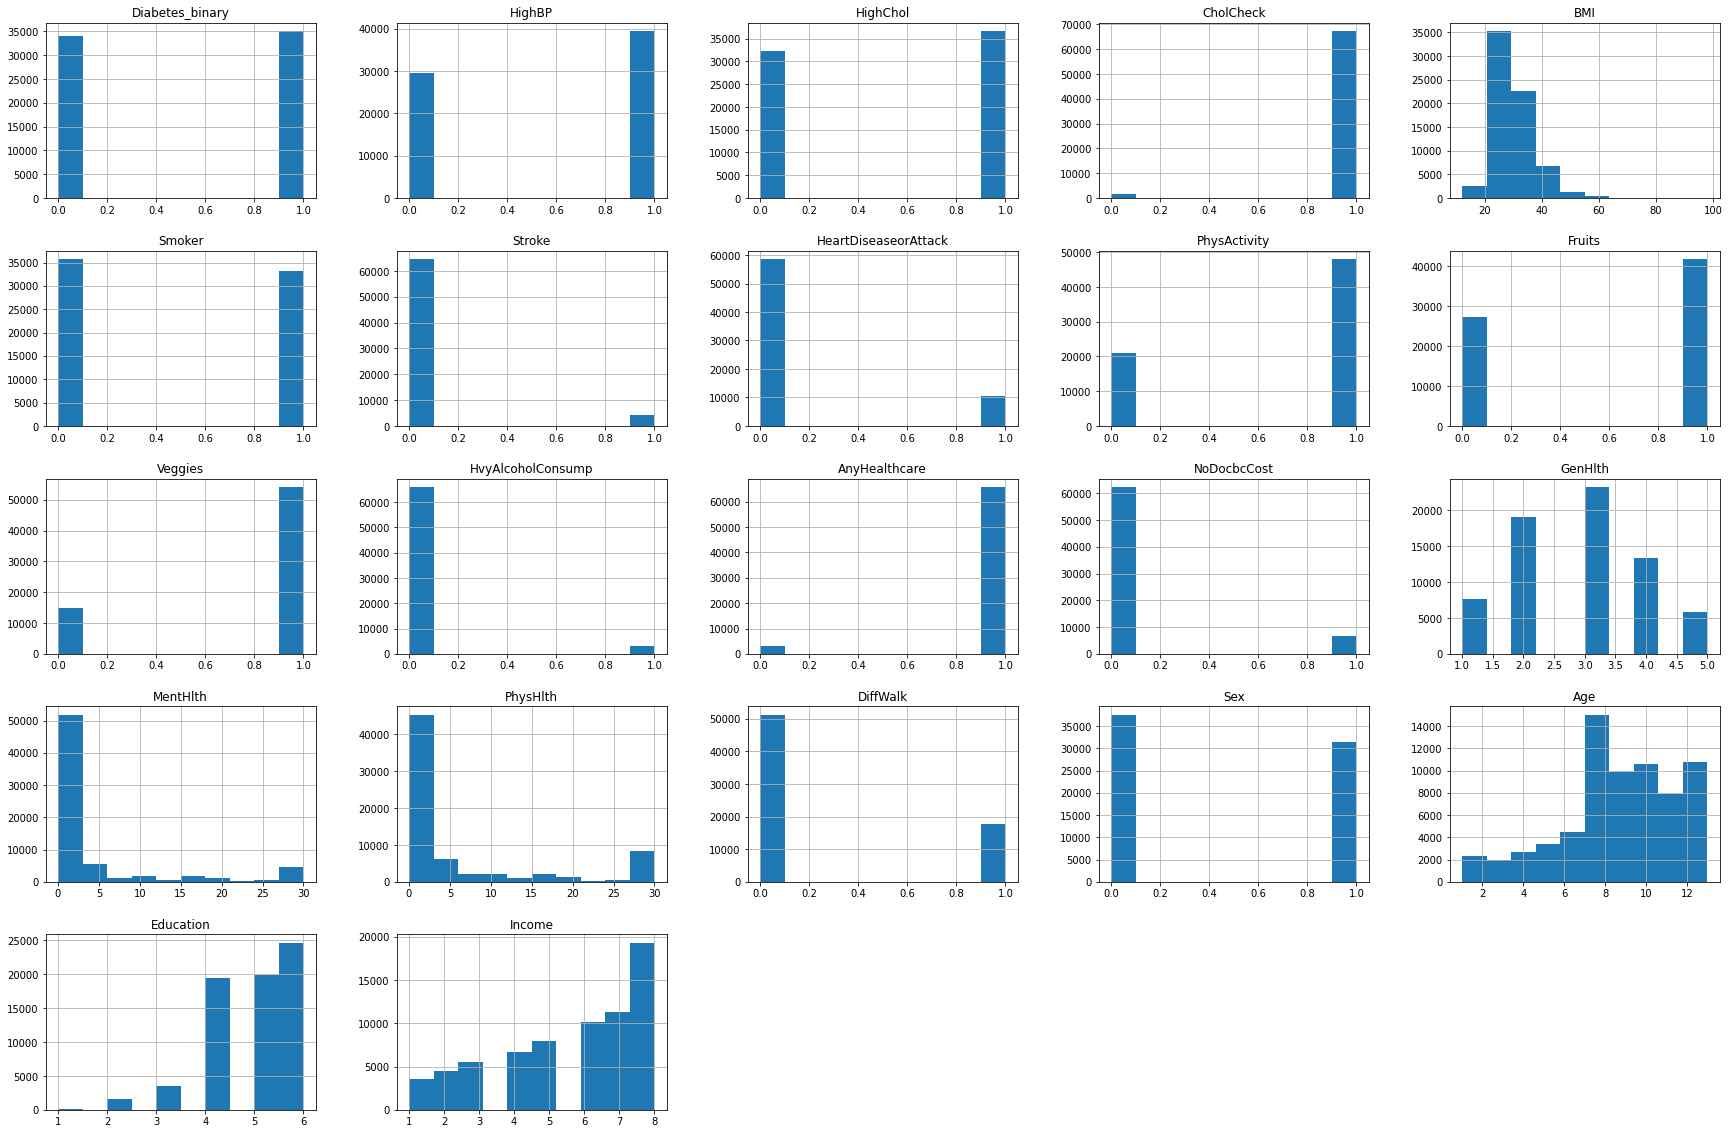

In [ ]:
#using histogram to understand dataset df1 better
df.hist(figsize=(30,20));

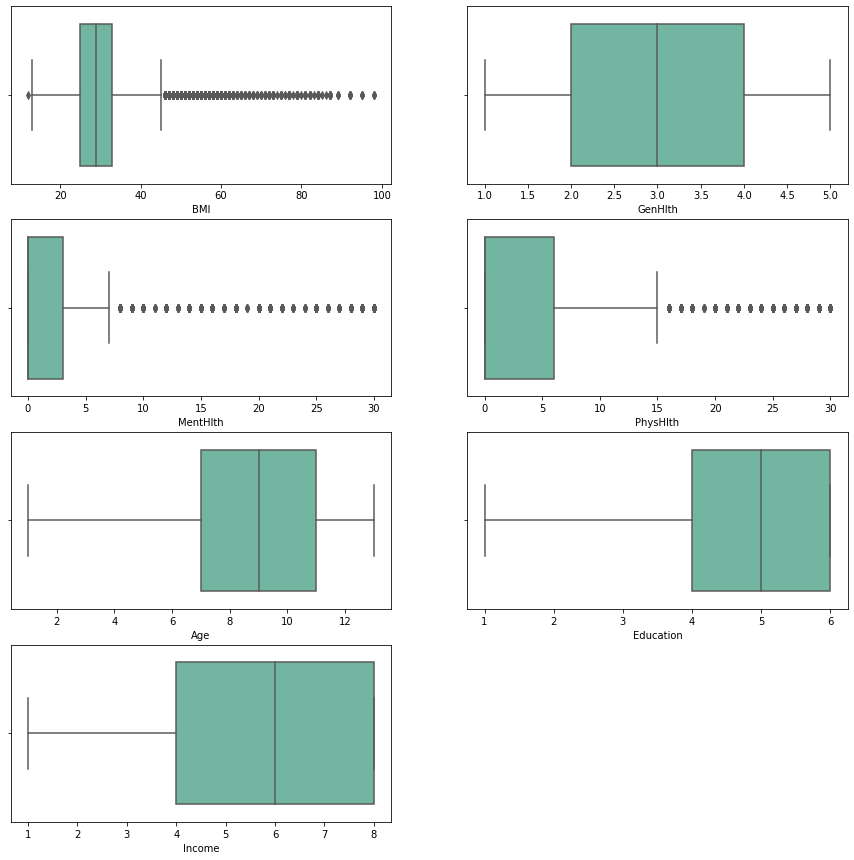

In [ ]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = df ,palette='Set2')
plt.show()

Text(0.5, 1.0, 'correlation of feature')

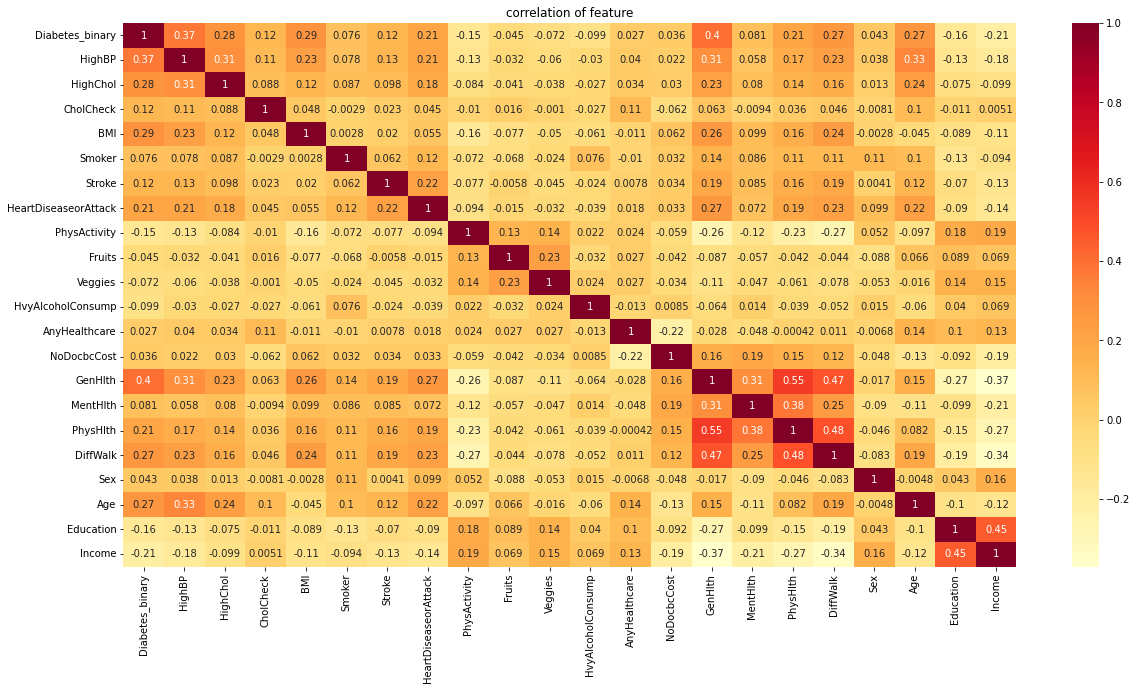

In [ ]:
#using heatmap to understand correlation better in dataset df1
#Heatmap of correlation
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

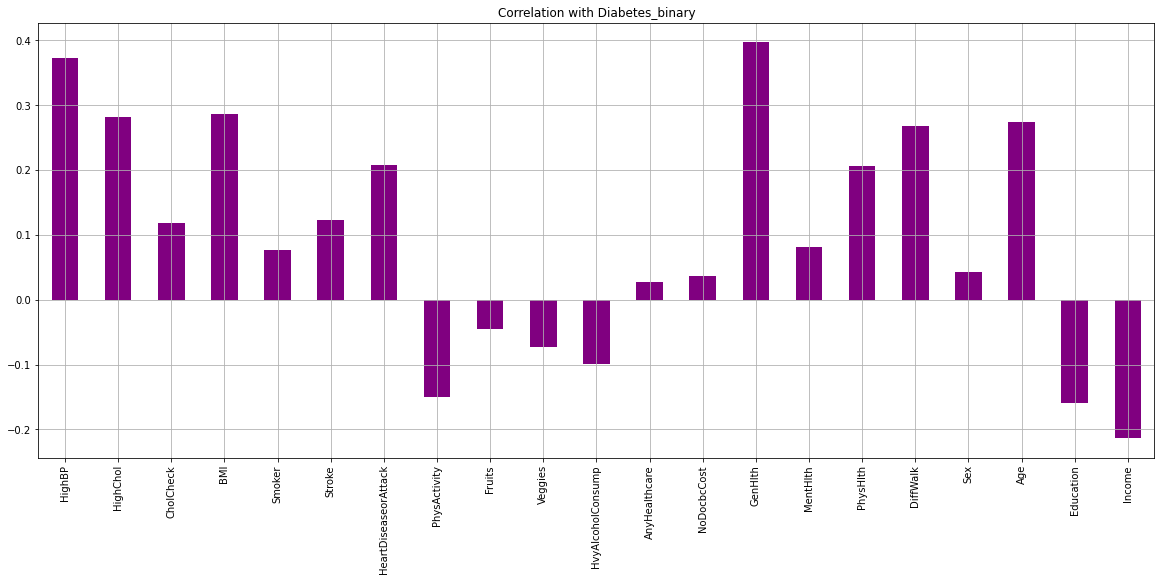

In [ ]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary",color="Purple");

## 2.5 Data Spliting and Scaling

In [ ]:
X=df.drop(["Diabetes_binary", "Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare"],axis=1)
Y=df["Diabetes_binary"]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69057 entries, 0 to 70691
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                69057 non-null  float64
 1   HighChol              69057 non-null  float64
 2   BMI                   69057 non-null  float64
 3   Smoker                69057 non-null  float64
 4   Stroke                69057 non-null  float64
 5   HeartDiseaseorAttack  69057 non-null  float64
 6   PhysActivity          69057 non-null  float64
 7   HvyAlcoholConsump     69057 non-null  float64
 8   NoDocbcCost           69057 non-null  float64
 9   GenHlth               69057 non-null  float64
 10  MentHlth              69057 non-null  float64
 11  PhysHlth              69057 non-null  float64
 12  DiffWalk              69057 non-null  float64
 13  Age                   69057 non-null  float64
 14  Education             69057 non-null  float64
 15  Income             

**Xử lý mất cân bằng dữ liệu**

In [ ]:
Y.value_counts()

1.0    35097
0.0    33960
Name: Diabetes_binary, dtype: int64

In [ ]:
x_sm, y_sm = X, Y

In [ ]:
%%script echo skipping
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 10)

x_sm,y_sm= nm.fit_resample(X,Y)

skipping


In [ ]:
y_sm.value_counts()

1.0    35097
0.0    33960
Name: Diabetes_binary, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(x_sm,y_sm, test_size=0.3 , random_state=42)

In [ ]:
X_train_notscaled = X_train.copy()
X_test_notscaled = X_test.copy()

In [ ]:
x_sm

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
0,1.0,0.0,26.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,5.0,30.0,0.0,4.0,6.0,8.0
1,1.0,1.0,26.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,12.0,6.0,8.0
2,0.0,0.0,26.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,10.0,0.0,13.0,6.0,8.0
3,1.0,1.0,28.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,3.0,0.0,11.0,6.0,8.0
4,0.0,0.0,29.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,0.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,0.0,1.0,29.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,25.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,15.0,0.0,1.0,13.0,6.0,4.0
70690,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,11.0,2.0,4.0


In [ ]:
unique_values = {}
for col in x_sm.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
HighBP,2
HighChol,2
BMI,80
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
HvyAlcoholConsump,2
NoDocbcCost,2
GenHlth,5


**Những feature cần được chuẩn hóa**

In [ ]:
needscale = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

In [ ]:

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(X_train[needscale])
X_train[needscale] = scalar.transform(X_train[needscale])
X_test[needscale] = scalar.transform(X_test[needscale])

In [ ]:
X_train_notscaled

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
40178,1.0,1.0,24.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,30.0,0.0,1.0,8.0,4.0,3.0
66976,1.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,10.0,0.0,13.0,4.0,4.0
43595,1.0,1.0,29.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,7.0,6.0,8.0
40432,1.0,0.0,32.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,2.0,2.0,1.0,10.0,6.0,3.0
12434,1.0,0.0,24.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,2.0,0.0,7.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38585,0.0,0.0,39.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,30.0,1.0,10.0,6.0,1.0
6332,1.0,1.0,24.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,20.0,10.0,1.0,10.0,2.0,2.0
56365,1.0,1.0,26.0,1.0,1.0,0.0,1.0,0.0,0.0,4.0,30.0,0.0,0.0,12.0,3.0,3.0
862,0.0,0.0,29.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,0.0,15.0,1.0,7.0,4.0,3.0


In [ ]:
X_test_notscaled

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
52695,1.0,1.0,30.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,10.0,6.0,8.0
15951,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,6.0,8.0
40727,1.0,1.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,20.0,1.0,13.0,4.0,6.0
45430,1.0,1.0,28.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,9.0,4.0,8.0
46668,1.0,1.0,34.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,11.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50252,1.0,1.0,31.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,9.0,5.0,7.0
43984,1.0,1.0,29.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,4.0,0.0,8.0,4.0,3.0
30048,0.0,0.0,28.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,30.0,0.0,0.0,9.0,4.0,3.0
55604,1.0,0.0,23.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,10.0,1.0,10.0,4.0,5.0


In [ ]:
X_train

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
40178,1.0,1.0,-0.832794,1.0,0.0,1.0,0.0,0.0,0.0,1.925200,3.155279,-0.588845,1.0,-0.210012,-0.868461,-1.221475
66976,1.0,0.0,-0.413128,0.0,0.0,0.0,0.0,0.0,0.0,1.023181,-0.225493,0.394880,0.0,1.535779,-0.868461,-0.760536
43595,1.0,1.0,-0.133351,0.0,0.0,0.0,1.0,0.0,0.0,0.121161,-0.466976,-0.588845,0.0,-0.559170,1.072118,1.083219
40432,1.0,0.0,0.286315,1.0,1.0,0.0,0.0,0.0,0.0,0.121161,-0.225493,-0.392100,1.0,0.488304,1.072118,-1.221475
12434,1.0,0.0,-0.832794,0.0,0.0,0.0,1.0,1.0,0.0,0.121161,-0.346235,-0.392100,0.0,-0.559170,1.072118,1.083219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38585,0.0,0.0,1.265535,0.0,0.0,1.0,0.0,0.0,0.0,1.925200,-0.466976,2.362330,1.0,0.488304,1.072118,-2.143353
6332,1.0,1.0,-0.832794,1.0,0.0,0.0,1.0,0.0,0.0,1.023181,1.947861,0.394880,1.0,0.488304,-2.809041,-1.682414
56365,1.0,1.0,-0.553017,1.0,1.0,0.0,1.0,0.0,0.0,1.023181,3.155279,-0.588845,0.0,1.186621,-1.838751,-1.221475
862,0.0,0.0,-0.133351,0.0,0.0,0.0,1.0,0.0,1.0,1.023181,-0.466976,0.886742,1.0,-0.559170,-0.868461,-1.221475


In [ ]:
X_test

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
52695,1.0,1.0,0.006537,0.0,0.0,0.0,1.0,0.0,0.0,-1.682878,-0.466976,-0.588845,0.0,0.488304,1.072118,1.083219
15951,1.0,1.0,-0.413128,1.0,0.0,0.0,0.0,0.0,0.0,-0.780858,-0.466976,-0.588845,0.0,-1.606645,1.072118,1.083219
40727,1.0,1.0,-0.133351,0.0,0.0,0.0,0.0,0.0,0.0,0.121161,-0.466976,1.378605,1.0,1.535779,-0.868461,0.161341
45430,1.0,1.0,-0.273240,1.0,0.0,0.0,1.0,0.0,0.0,0.121161,-0.466976,-0.588845,0.0,0.139146,-0.868461,1.083219
46668,1.0,1.0,0.566092,0.0,0.0,1.0,0.0,0.0,0.0,-0.780858,-0.466976,-0.588845,0.0,0.837463,0.101828,0.622280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50252,1.0,1.0,0.146426,1.0,0.0,0.0,1.0,0.0,0.0,0.121161,-0.466976,-0.490472,0.0,0.139146,0.101828,0.622280
43984,1.0,1.0,-0.133351,1.0,0.0,0.0,1.0,0.0,0.0,1.023181,-0.466976,-0.195355,0.0,-0.210012,-0.868461,-1.221475
30048,0.0,0.0,-0.273240,1.0,0.0,0.0,1.0,0.0,0.0,-0.780858,3.155279,-0.588845,0.0,0.139146,-0.868461,-1.221475
55604,1.0,0.0,-0.972683,1.0,0.0,0.0,1.0,0.0,0.0,-1.682878,-0.466976,0.394880,1.0,0.488304,-0.868461,-0.299597


## 2.6 Modeling

### 2.6.1 Mô hình mặc định

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
y_pred=rf.predict(X_test)

print('Training set score: {:.4f}'.format(rf.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(rf.score(X_test, Y_test)))

Training set score: 0.9860
Test set score: 0.7253


In [ ]:
from sklearn.metrics import mean_squared_error
import math
#check MSE & RMSE
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))



Mean Squared Error : 0.27468867651317697
Root Mean Squared Error : 0.524107504728922


In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.73      0.69      0.71     10120
         1.0       0.72      0.76      0.74     10598

    accuracy                           0.73     20718
   macro avg       0.73      0.72      0.72     20718
weighted avg       0.73      0.73      0.72     20718



In [ ]:
from sklearn.metrics import accuracy_score, f1_score
acc = accuracy_score(Y_test, y_pred)
f1_sc = f1_score(Y_test, y_pred)

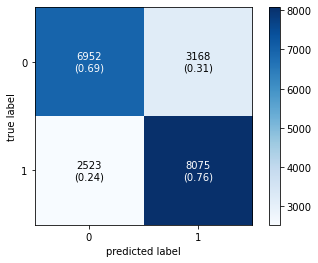

In [ ]:
# calculating and plotting the confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### 2.6.2 Mô hình với tham số tìm được bằng GridSearchCV

In [ ]:

param_grid = {
    'n_estimators': [100, 200, 800],
    'max_depth' : [4, 8, 16, 32, 64],
    'min_samples_leaf' : [1, 20, 40, 60],
    'min_samples_split': [2, 3, 4],
    'criterion' :['gini', 'entropy']
}

In [ ]:

from sklearn.model_selection import GridSearchCV
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rf.fit(X_train, Y_train)


skipping


In [ ]:
%%script echo skipping
CV_rf.best_params_

skipping


{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
rf_gs = RandomForestClassifier(max_depth=8, criterion='gini', n_estimators=200, min_samples_split=2, min_samples_leaf=1)
rf_gs.fit(X_train, Y_train)

RandomForestClassifier(max_depth=8, n_estimators=200)

In [ ]:
y_pred_gs =rf_gs.predict(X_test)

print('Training set score with GridSearchCV: {:.4f}'.format(rf_gs.score(X_train, Y_train)))

print('Test set score with GridSearchCV: {:.4f}'.format(rf_gs.score(X_test, Y_test)))

Training set score with GridSearchCV: 0.7519
Test set score with GridSearchCV: 0.7494


In [ ]:
mse_gs =mean_squared_error(Y_test, y_pred_gs)
print('Mean Squared Error with GridSearchCV: '+ str(mse_gs))
rmse_gs = math.sqrt(mean_squared_error(Y_test, y_pred_gs))
print('Root Mean Squared Error with GridSearchCV: '+ str(rmse_gs))

Mean Squared Error with GridSearchCV: 0.25055507288348294
Root Mean Squared Error with GridSearchCV: 0.5005547651191455


In [ ]:
matrix_gs = classification_report(Y_test,y_pred_gs)
print(matrix_gs)

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73     10120
         1.0       0.74      0.79      0.76     10598

    accuracy                           0.75     20718
   macro avg       0.75      0.75      0.75     20718
weighted avg       0.75      0.75      0.75     20718



In [ ]:
from sklearn.metrics import accuracy_score, f1_score
acc_gs = accuracy_score(Y_test, y_pred_gs)
f1_sc_gs = f1_score(Y_test, y_pred_gs)

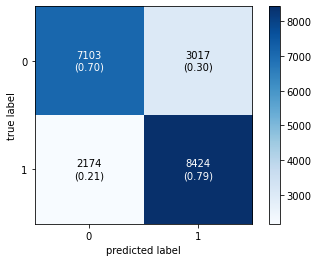

In [ ]:
cm_gs = confusion_matrix(Y_test,y_pred_gs)
plot_confusion_matrix(conf_mat=cm_gs,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### 2.6.3 Mô hình mặc định với dữ liệu không scale

In [ ]:
rf_ns = RandomForestClassifier()
rf_ns.fit(X_train_notscaled, Y_train)

RandomForestClassifier()

In [ ]:
y_pred_ns=rf_ns.predict(X_test_notscaled)

print('Training set score: {:.4f}'.format(rf_ns.score(X_train_notscaled, Y_train)))

print('Test set score: {:.4f}'.format(rf_ns.score(X_test_notscaled, Y_test)))

Training set score: 0.9860
Test set score: 0.7272


In [ ]:
mse =mean_squared_error(Y_test, y_pred_ns)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred_ns))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.27275798822280145
Root Mean Squared Error : 0.522262374887184


In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(Y_test,y_pred_ns)
print(matrix)

              precision    recall  f1-score   support

         0.0       0.74      0.69      0.71     10120
         1.0       0.72      0.76      0.74     10598

    accuracy                           0.73     20718
   macro avg       0.73      0.73      0.73     20718
weighted avg       0.73      0.73      0.73     20718



In [ ]:
acc_ns = accuracy_score(Y_test, y_pred_ns)
f1_sc_ns = f1_score(Y_test, y_pred_ns)

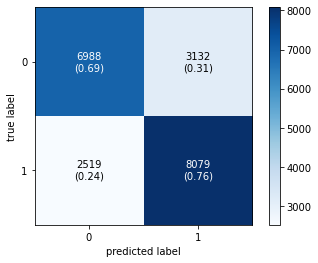

In [ ]:
cm1 = confusion_matrix(Y_test,y_pred_ns)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### 2.6.4 Mô hình với tham số tìm được bằng GridSearchCV với dữ liệu không scale

In [ ]:
rf_gs_ns = RandomForestClassifier(max_depth=8, criterion='gini', n_estimators=200, min_samples_split=2, min_samples_leaf=1)
rf_gs_ns.fit(X_train_notscaled, Y_train)

RandomForestClassifier(max_depth=8, n_estimators=200)

In [ ]:
y_pred_gs_ns=rf_gs_ns.predict(X_test_notscaled)

print('Training set score: {:.4f}'.format(rf_gs_ns.score(X_train_notscaled, Y_train)))

print('Test set score: {:.4f}'.format(rf_gs_ns.score(X_test_notscaled, Y_test)))

Training set score: 0.7525
Test set score: 0.7505


In [ ]:
mse =mean_squared_error(Y_test, y_pred_gs_ns)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred_gs_ns))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.24949319432377642
Root Mean Squared Error : 0.49949293721110455


In [ ]:
matrix = classification_report(Y_test,y_pred_gs_ns)
print(matrix)

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73     10120
         1.0       0.74      0.80      0.77     10598

    accuracy                           0.75     20718
   macro avg       0.75      0.75      0.75     20718
weighted avg       0.75      0.75      0.75     20718



In [ ]:
acc_gs_ns = accuracy_score(Y_test, y_pred_gs_ns)
f1_sc_gs_ns = f1_score(Y_test, y_pred_gs_ns)

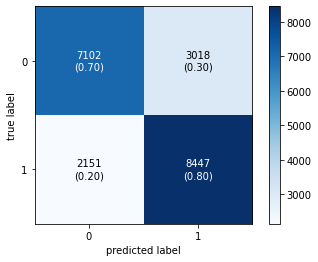

In [ ]:
cm1 = confusion_matrix(Y_test,y_pred_gs_ns)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## 2.7 So sánh 2 mô hình

In [ ]:
# %%script echo skipping
from sklearn.metrics import accuracy_score, make_scorer, f1_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
ct = StandardScaler()

scaler = ColumnTransformer(transformers = [('scaler',StandardScaler(), needscale)])
rf_kf = RandomForestClassifier()
rf_gs_kf = RandomForestClassifier(max_depth=8, criterion='gini', n_estimators=200, min_samples_split=2, min_samples_leaf=1)
pipeline = Pipeline([('transformer', scaler), ('estimator', rf_kf)])
pipeline_gs = Pipeline([('transformer', scaler), ('estimator', rf_gs_kf)])
kf = KFold(5, shuffle=True, random_state=42)
f1_sc_kf = cross_val_score(estimator=pipeline, X=x_sm, y=y_sm,cv=kf,scoring='f1').mean()
f1_sc_gs_kf = cross_val_score(estimator=pipeline_gs, X=x_sm, y=y_sm,cv=kf,scoring='f1').mean()
acc_kf = cross_val_score(estimator=pipeline, X=x_sm, y=y_sm,cv=kf,scoring='accuracy').mean()
acc_gs_kf = cross_val_score(estimator=pipeline_gs, X=x_sm, y=y_sm,cv=kf,scoring='accuracy').mean()
acc_kf_ns = cross_val_score(estimator=rf_kf, X=x_sm, y=y_sm,cv=kf,scoring='accuracy').mean()
acc_gs_kf_ns = cross_val_score(estimator=rf_gs_kf, X=x_sm, y=y_sm,cv=kf,scoring='accuracy').mean()
f1_sc_kf_ns = cross_val_score(estimator=rf_kf, X=x_sm, y=y_sm,cv=kf,scoring='f1').mean()
f1_sc_gs_kf_ns = cross_val_score(estimator=rf_gs_kf, X=x_sm, y=y_sm,cv=kf,scoring='f1').mean()
# acc = accuracy_score(Y_test, y_pred)
# acc_gs = accuracy_score(Y_test, y_pred_gs)
# f1_sc = f1_score(Y_test, y_pred)
# f1_sc_gs = f1_score(Y_test, y_pred_gs)


In [ ]:
print('Accuracy of default parameters with scaling: ', acc)
print('Accuracy of optimal parameters with scaling: ', acc_gs)
print('F1 Score of default parameters with scaling: ', f1_sc)
print('F1 Score of optimal parameters with scaling: ', f1_sc_gs)
print('Accuracy of default parameters without scaling: ', acc_ns)
print('Accuracy of optimal parameters without scaling: ', acc_gs_ns)
print('F1 Score of default parameters without scaling: ', f1_sc_ns)
print('F1 Score of optimal parameters without scaling: ', f1_sc_gs_ns)

Accuracy of default parameters with scaling:  0.725311323486823
Accuracy of optimal parameters with scaling:  0.749444927116517
F1 Score of default parameters with scaling:  0.739435007554599
F1 Score of optimal parameters with scaling:  0.7644629974136757
Accuracy of default parameters without scaling:  0.7272420117771986
Accuracy of optimal parameters without scaling:  0.7505068056762235
F1 Score of default parameters without scaling:  0.7408867898573982
F1 Score of optimal parameters without scaling:  0.7657163577029417


In [ ]:
print('Accuracy of default parameters with scaling (5 Folds): ', acc_kf)
print('Accuracy of optimal parameters with scaling (5 Folds): ', acc_gs_kf)
print('F1 Score of default parameters with scaling (5 Folds): ', f1_sc_kf)
print('F1 Score of optimal parameters with scaling (5 Folds): ', f1_sc_gs_kf)
print('Accuracy of default parameters without scaling (5 Folds): ', acc_kf_ns)
print('Accuracy of optimal parameters without scaling (5 Folds): ', acc_gs_kf_ns)
print('F1 Score of default parameters without scaling (5 Folds): ', f1_sc_kf_ns)
print('F1 Score of optimal parameters without scaling (5 Folds): ', f1_sc_gs_kf_ns)

Accuracy of default parameters with scaling (5 Folds):  0.6919066755382429
Accuracy of optimal parameters with scaling (5 Folds):  0.7291221800877565
F1 Score of default parameters with scaling (5 Folds):  0.7058388683202832
F1 Score of optimal parameters with scaling (5 Folds):  0.7469112825820187
Accuracy of default parameters without scaling (5 Folds):  0.7212156739373204
Accuracy of optimal parameters without scaling (5 Folds):  0.7441676724985099
F1 Score of default parameters without scaling (5 Folds):  0.7361548729424338
F1 Score of optimal parameters without scaling (5 Folds):  0.7589886321334076


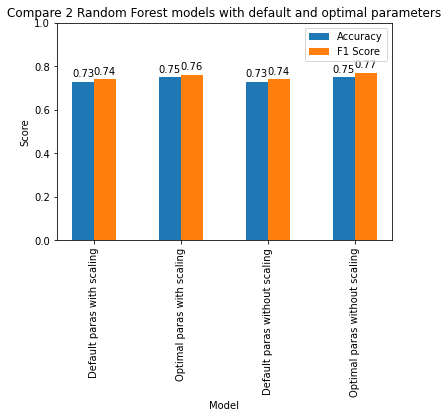

In [ ]:
import matplotlib.pyplot as plt
X = ['Default paras with scaling','Optimal paras with scaling', 'Default paras without scaling', 'Optimal paras without scaling']
acc = np.round(acc, 2)
acc_gs = np.round(acc_gs, 2)
f1_sc = np.round(f1_sc, 2)
f1_sc_gs = np.round(f1_sc_gs, 2)
acc_ns = np.round(acc_ns, 2)
acc_gs_ns = np.round(acc_gs_ns, 2)
f1_sc_ns = np.round(f1_sc_ns, 2)
f1_sc_gs_ns = np.round(f1_sc_gs_ns, 2)
acc_ = [acc, acc_gs, acc_ns, acc_gs_ns]
f1_ = [f1_sc, f1_sc_gs, f1_sc_ns, f1_sc_gs_ns]
X_axis = np.arange(len(X))
r = np.arange(len(acc_))
width = 0.25
fig, ax = plt.subplots()
rects1 = ax.bar(X_axis - width/2, acc_, width, label='Accuracy')
rects2 = ax.bar(X_axis + width/2, f1_, width, label='F1 Score')
plt.xticks(X_axis, X, rotation=90)
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Compare 2 Random Forest models with default and optimal parameters")
plt.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
plt.ylim(0, 1)
plt.show()

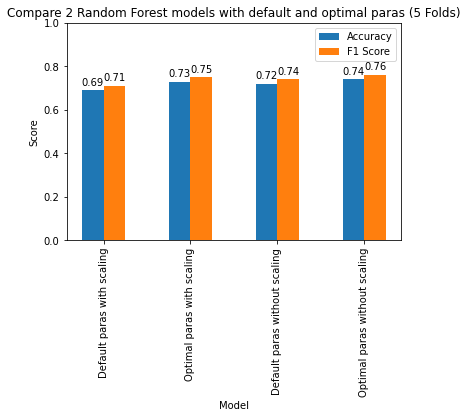

In [ ]:
import matplotlib.pyplot as plt
X = ['Default paras with scaling','Optimal paras with scaling', 'Default paras without scaling', 'Optimal paras without scaling']
acc_kf = np.round(acc_kf, 2)
acc_gs_kf = np.round(acc_gs_kf, 2)
f1_sc_kf = np.round(f1_sc_kf, 2)
f1_sc_gs_kf = np.round(f1_sc_gs_kf, 2)
acc_kf_ns = np.round(acc_kf_ns, 2)
acc_gs_kf_ns = np.round(acc_gs_kf_ns, 2)
f1_sc_kf_ns = np.round(f1_sc_kf_ns, 2)
f1_sc_gs_kf_ns = np.round(f1_sc_gs_kf_ns, 2)
acc_ = [acc_kf, acc_gs_kf, acc_kf_ns, acc_gs_kf_ns]
f1_ = [f1_sc_kf, f1_sc_gs_kf, f1_sc_kf_ns, f1_sc_gs_kf_ns]
X_axis = np.arange(len(X))
r = np.arange(len(acc_))
width = 0.25
fig, ax = plt.subplots()
rects1 = ax.bar(X_axis - width/2, acc_, width, label='Accuracy')
rects2 = ax.bar(X_axis + width/2, f1_, width, label='F1 Score')
plt.xticks(X_axis, X, rotation=90)
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Compare 2 Random Forest models with default and optimal paras (5 Folds)")
plt.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
plt.ylim(0, 1)
plt.show()

Kết luận:

1.   Mô hình với tham số tìm thấy bằng GridSearch cho ra kết quả tốt hơn 1 chút so với mô hình không truyền tham số!
2.  Logistic Regression và các mô hình dựa trên cây như Decision Tree, Random Forest, Gradient Boosting không nhạy cảm với độ lớn của các biến, do đó chuẩn hóa dữ liệu không cần thiết với các mô hình này.


